# **CALORIES BURNT PREDICTION**

# **Listing The Directory item**

In [ ]:
# loading the data from csv file to a Pandas DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# **Load the Dataset**

In [ ]:
# Load the Calories burnt dataset
df=pd.read_csv('/content/drive/MyDrive/data science/calories_data.csv')
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


# **Data Preprocessing**

In [ ]:
# checking the number of rows and columns
df.shape

(15000, 9)

In [ ]:
#Check the missing values
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
Calories        int64
dtype: object

In [ ]:
# get some statistical measures about the data
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.545133,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.345422,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,55.000000,128.000000,41.500000,314.000000


# **Drop Columns**

In [ ]:
#Dropping column(User_ID) since it does not contribute to r2 score
df.drop(['User_ID'],axis=1,inplace=True)
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190,94,29,105,40.8,231
1,female,20,166,60,14,94,40.3,66
2,male,69,179,79,5,88,38.7,26
3,female,34,179,71,13,100,40.5,71
4,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...
14995,female,20,193,86,11,92,40.4,45
14996,female,27,165,65,6,85,39.2,23
14997,female,43,159,58,16,90,40.1,75
14998,male,78,193,97,2,84,38.3,11


# **Data Visualization**

In [ ]:
df['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

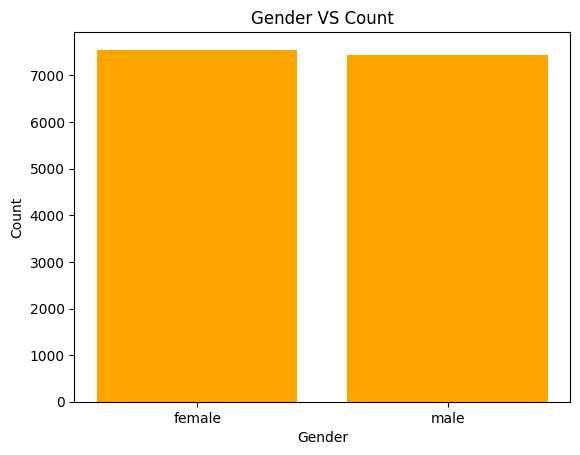

In [ ]:
# plotting the gender column in count plot
x=['female','male']
y=[7553,7447]
plt.bar(x,y,color='orange')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender VS Count')
plt.show()

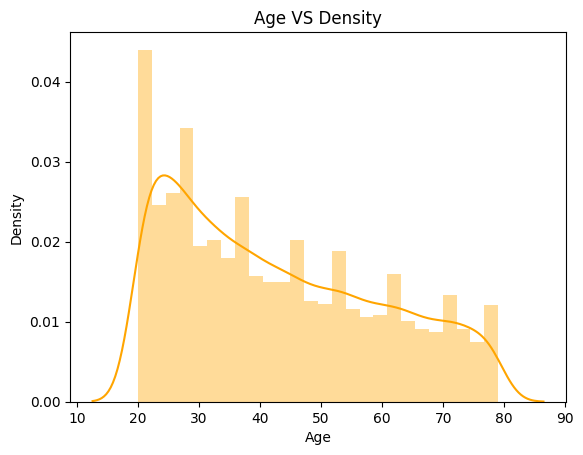

In [ ]:
# finding the distribution of "Age" column
plt.title('Age VS Density')
sns.distplot(df['Age'],color='orange')
plt.show() #to create a bar chart based on the 'Gender' column from the DataFrame df.#Additionally, it uses the 'Age' column to differentiate the count base

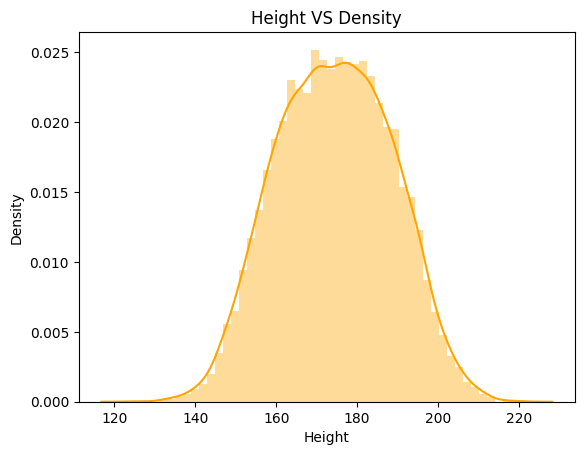

In [ ]:
# finding the distribution of "Height" column
plt.title('Height VS Density')
sns.distplot(df['Height'],color='orange')
plt.show()

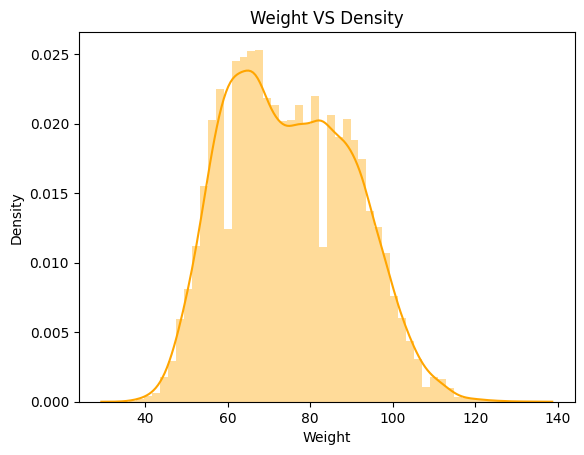

In [ ]:
# finding the distribution of "Weight" column
plt.title('Weight VS Density')
sns.distplot(df['Weight'],color='orange')
plt.show()

# **Converting the text data to numerical values**

In [ ]:
# Label Encoding is a technique used to convert categorical variables to numerical values
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190,94,29,105,40.8,231
1,0,20,166,60,14,94,40.3,66
2,1,69,179,79,5,88,38.7,26
3,0,34,179,71,13,100,40.5,71
4,0,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...
14995,0,20,193,86,11,92,40.4,45
14996,0,27,165,65,6,85,39.2,23
14997,0,43,159,58,16,90,40.1,75
14998,1,78,193,97,2,84,38.3,11


# **Separating features and Target**

In [ ]:
# Assuming you have a 'Target' column that you want to predict
X = df.iloc[:,:-1]     # Features(Independent variable)
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190,94,29,105,40.8
1,0,20,166,60,14,94,40.3
2,1,69,179,79,5,88,38.7
3,0,34,179,71,13,100,40.5
4,0,27,154,58,10,81,39.8
...,...,...,...,...,...,...,...
14995,0,20,193,86,11,92,40.4
14996,0,27,165,65,6,85,39.2
14997,0,43,159,58,16,90,40.1
14998,1,78,193,97,2,84,38.3


In [ ]:
# Target variable
y= df.iloc[:,-1]
y

0        231
1         66
2         26
3         71
4         35
        ... 
14995     45
14996     23
14997     75
14998     11
14999     98
Name: Calories, Length: 15000, dtype: int64

# **Splitting the data into training data and Test data**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# **Build and Train Model**

In [ ]:
# loading the model
lr=LinearRegression()
sv=SVR()
knn=KNeighborsRegressor(n_neighbors=5)
xgb=XGBRegressor()

# **Make Predictions and Evaluate the Model:**

In [ ]:
# Make predictions on the test data
models=[lr,sv,knn,xgb]
for model in models:
  print("****************************",model,"*************************************")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('R2 SCORE',r2_score(y_test,y_pred))
  print('MAE',mean_absolute_error(y_test,y_pred))
  print('MSE',mean_squared_error(y_test,y_pred))
  print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

**************************** LinearRegression() *************************************
R2 SCORE 0.9600476932116037
MAE 8.491265606330852
MSE 159.30729938057965
RMSE: 12.621699544062189
**************************** SVR() *************************************
R2 SCORE 0.9273128053566947
MAE 11.49835814974191
MSE 289.8355967154983
RMSE: 17.024558634969022
**************************** KNeighborsRegressor() *************************************
R2 SCORE 0.9853648763217149
MAE 5.2828888888888885
MSE 58.356631111111106
RMSE: 7.639151203576946
**************************** XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             m

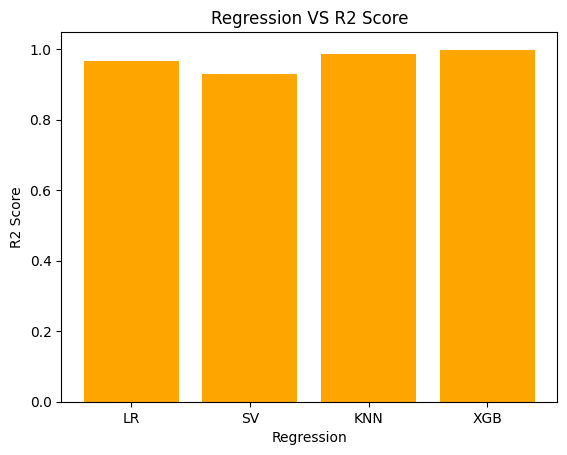

In [ ]:
x=['LR','SV','KNN','XGB']
y=[0.966582,0.929673,0.986719,0.998651]
plt.bar(x,y,color='orange')
plt.xlabel('Regression')
plt.ylabel('R2 Score')
plt.title('Regression VS R2 Score')
plt.show()

from above evaluation XGBoost regressor have best accuray score while  have SVR worst accuracy

# **Hyperparameter Tunning:**

hyperparameter tuning also know as hyperparameter optimization,is the process of finding the best set of hyperparameters for a machine learning model to achieve optimal performance

In [ ]:
xgb1=XGBRegressor()
params={'n_estimators': [100, 200, 300],'max_depth': [3, 4, 5]}
reg=GridSearchCV(xgb1,params,cv=10)
reg.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [ ]:
#taking best parameters
print(reg.best_params_)

{'max_depth': 4, 'n_estimators': 300}


In [ ]:
xgb_new=XGBRegressor(n_estimators=300,max_depth=4)
xgb_new.fit(X_train,y_train)
y_pred=xgb_new.predict(X_test)
y_pred

array([197.21617 ,  72.93504 , 198.52702 , ..., 218.25858 ,  20.294018,
        48.795204], dtype=float32)

In [ ]:
print('R2 SCORE',r2_score(y_test,y_pred))

R2 SCORE 0.9988403845711603


In [ ]:
y_new=xgb.predict([[0,22,153,50,30,107,37.5]])
y_new

array([179.85309], dtype=float32)

In [ ]:
print('Predicted Calories is:',y_new.item())

Predicted Calories is: 179.85308837890625


In [ ]:
import joblib
joblib.dump(xgb_new,"model.joblib")

['model.joblib']